In [2]:
%matplotlib inline

NameError: name 'lines' is not defined

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

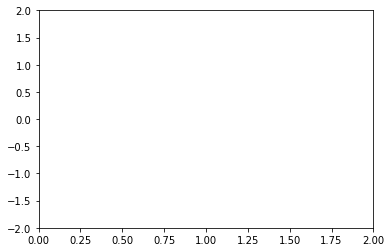

In [4]:

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [5]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [6]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
anim._repr_html_() is None

In [ ]:
anim

In [ ]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [ ]:
anim

NameError: name 'Gen_RandLine' is not defined

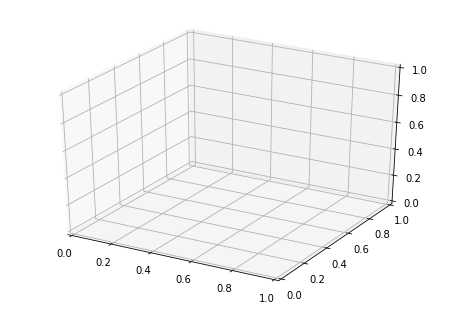

In [7]:
"""
A simple example of an animated plot... In 3D!
"""
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation


def update_lines(num, dataLines, lines) :
    #for line, data in zip(lines, dataLines) :
    # NOTE: there is no .set_data() for 3 dim data...
    lines[0].set_data(dat1[0:2, :num])
    lines[0].set_3d_properties(dat1[2,:num])

    lines[1].set_data(dat1[0:2, num])
    lines[1].set_3d_properties(dat1[2,num])
        

    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(100, 3) for index in range(2)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
dat1=data[0] 
dat2=data[1] 

lines = [ax.plot(dat1[0, 0:1], dat1[1, 0:1], dat1[2, 0:1])[0], ax.plot(dat1[0, 0:1], dat1[1, 0:1], dat1[2, 0:1],'o-')[0]]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                              interval=50, blit=False)

plt.show()

In [8]:


cir=[]
i=0
while i<101:
    y=3+np.sin(2*3.14*(i/100))
    x=3+np.cos(2*3.14*(i/100))
    c=[0,x,y]
    #print(c)
    cir.append(c)
    i=i+1

cir11=[]
i=0
while i<51:
    y=3+np.sin(2*3.14*(i/101)+3.14/4)
    x=3+np.cos(2*3.14*(i/101)+3.14/4)
    c=[0,x,y]
    #print(c)
    cir11.append(c)
    i=i+1
    
    
cir2=[]
i=0
while i<101:
    y=3+np.sin(2*3.14*(i/100))
    x=3+np.cos(2*3.14*(i/100))
    c=[2,x,y]
    #print(c)
    cir2.append(c)
    i=i+1


cir22=[]
i=0
while i<51:
    y=3+np.sin(2*3.14*(i/101)+3.14/4)
    x=3+np.cos(2*3.14*(i/101)+3.14/4)
    c=[2,x,y]
    #print(c)
    cir22.append(c)
    i=i+1

    
cir=np.transpose(cir)
cir11=np.transpose(cir11)  
cir2=np.transpose(cir2)    
cir22=np.transpose(cir22)  


In [199]:
HTML(line_ani.to_html5_video())

In [9]:
import numpy as np
from scipy.integrate import odeint
import loopfield as lf 
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# create empty field with specified units 
field = lf.Field(length_units = lf.cm, 
current_units = lf.A, 
field_units = lf.uT) 

# single-turn 10 cm x-oriented coil at origin 
position = [0, 3., 3.] 
normal = [1, 0., 0.] 
radius = 1. 
current = -1. 
c = lf.Loop(position, normal, radius, current) 


# add loop to field 
field.addLoop(c); 


position = [2., 3.,3.] 
normal = [1, 0., 0] 
radius = 1. 
current = -1. 
d = lf.Loop(position, normal, radius, current) 
field.addLoop(d); 

# evaluate vector field at origin 
B = field.evaluate([0., 3, 3.]) 
print('B = ', B) 

B =  [-68.45170486   0.           0.        ]


In [10]:
def Ef(r):
    Ex=0;
    Ey=0;
    Ez=0;
    return (Ex,Ey,Ez)

def Bf(r):
    #Bx=-r[0]/2
    #By=-r[1]/2
    #Bz=(10+1*r[2]**2);
    return field.evaluate(r)

def f(Q,t,qm):
    r=Q[:3]
    v=Q[3:]
    drdt=v
    dvdt=qm*(Ef(r)+np.cross(v,Bf(r)))
    return np.concatenate((v,dvdt))

def solve(ri,vi,qm):
    Q0=np.concatenate((ri,vi))
    tf = 10; NPts = 1000
    t = np.linspace(0,tf,NPts)
    Qe = odeint(f, Q0, t, args=(qm,))
    return Qe


Q=solve((1,3,3),(-2,4,4),-1)

Q=np.transpose(Q)

r=Q[:3]

In [11]:
def update_lines(num, dataLines, lines) :
    #for line, data in zip(lines, dataLines) :
    # NOTE: there is no .set_data() for 3 dim data...
    xd=0
    if num>55:
        xd=num-55
            
    lines[0].set_data(dat1[0:2, xd:num])
    lines[0].set_3d_properties(dat1[2,xd:num])

    lines[1].set_data(dat1[0:2, num])
    lines[1].set_3d_properties(dat1[2,num])
        
    ax.plot(cir2[0],cir2[1],cir2[2],lw=5,c='red')
    return lines

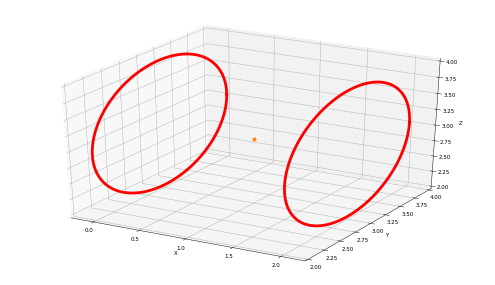

In [13]:
fig = plt.figure(figsize=(12, 6.75), dpi=40)
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
#data = [Gen_RandLine(100, 3) for index in range(2)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
dat1=r 

ax.plot(cir[0],cir[1],cir[2],lw=5,c='red')


lines = [ax.plot(dat1[0, 0:1], dat1[1, 0:1], dat1[2, 0:1])[0], ax.plot(dat1[0, 0:1], dat1[1, 0:1], dat1[2, 0:1],'o-')[0]]

# Setting the axes properties
ax.set_xlim3d([-0.2, 2.2])
ax.set_xlabel('X')

ax.set_ylim3d([2, 4])
ax.set_ylabel('Y')

ax.set_zlim3d([2, 4])
ax.set_zlabel('Z')

#ax.set_title('3D Test')


# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines,1000, fargs=(dat1, lines),
                              interval=50, blit=False)
#line_ani.save("mag_bottle.mp4",dpi=200)

In [343]:
basex=[2.5]#=list(np.arange(-0.5, 2.6, 1))
basey=list(np.arange(2, 4.1, 1))
basez=list(np.arange(2, 4.1, 1))

In [14]:
lines

In [414]:
def flines(r,t,ds):
    Bx=Bf(r)[0]
    By=Bf(r)[1]
    Bz=Bf(r)[2]
    Bm=np.sqrt(Bx**2+By**2+Bz**2)
    return ds*Bf(r)/Bm

def solve(ri,ds):
    np.array(ri)
    tf = 40; NPts = 50
    t = np.linspace(0,tf,NPts)
    Qe = odeint(flines, ri, t, args=(ds,))
    return Qe



set_bl=[]
for xi in basex:
    for yi in basey:
        for zi in basez:
            bl=solve((xi,yi,zi),0.1)
            set_bl.append(bl)            

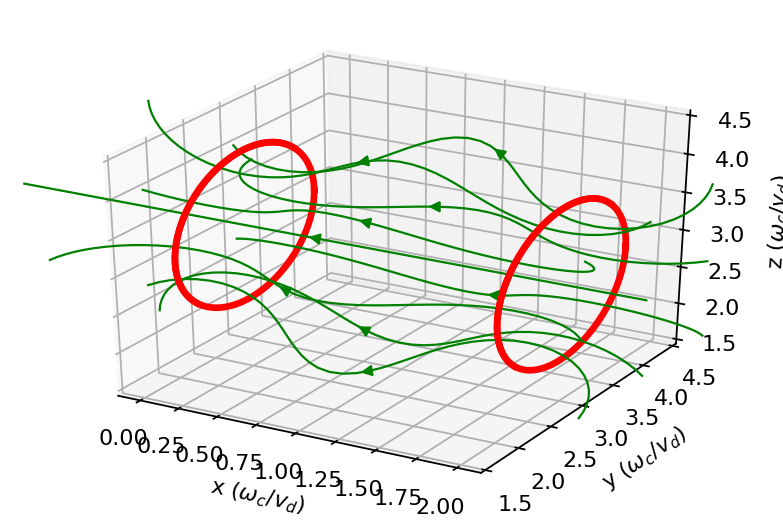

In [415]:
fig = plt.figure(dpi=160)
ax=fig.gca(projection='3d')
#fig.subplots_adjust(top=0.85)
#ax.set_title('Some drift')

ax.set_xlabel('x ($\omega_c/v_d$)')
ax.set_ylabel('y ($\omega_c/v_d$)')
ax.set_zlabel('z ($\omega_c/v_d$)')




#r=np.transpose(r)
#print(r)

ax.plot(cir[0],cir[1],cir[2],lw=3,c='red')
ax.plot(cir2[0],cir2[1],cir2[2],lw=3,c='red')

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


for bli in set_bl:
    ra=bli[int(len(bli)/2)]
    rb=bli[int(len(bli)/2)+1]
    bli=np.transpose(bli)
    ax.plot(bli[0],bli[1],bli[2],lw=1,c='green',clip_on = False, markevery=1)
    a = Arrow3D([ra[0],rb[0]],[ra[1],rb[1]],[ra[2],rb[2]], mutation_scale=10,lw=1, arrowstyle="-|>", color="g")
    ax.add_artist(a)

    #ax.scatter(bli[0,0],bli[1,0],bli[2,0],c='red')

#p = Circle((5, 5), 3)
#ax.add_patch(p)
#art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")



ax.plot(cir11[0],cir11[1],cir11[2],lw=3,c='red')
ax.plot(cir22[0],cir22[1],cir22[2],lw=3,c='red')

#print(r)
#fig.savefig('drft.pdf')

ax.set_xlim3d([-0.1, 2.1])

ax.set_ylim3d([1.5, 4.5])

ax.set_zlim3d([1.5, 4.5])


plt.show()


In [356]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)



In [372]:
v

array([-0.00688784,  0.00512629,  0.00512629])

In [373]:
ra

array([ 0.76288379,  2.05779756,  2.05779756])